In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.input_area pre {font-family: Consolas; font-size: 12pt; line-height: 140%;}</style>"))
display(HTML("<style>.output_area pre {font-family: Consolas; font-size: 12pt; line-height: 140%;}</style>"))

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

# Data Field
## train
- game_id: 게임별 고유 아이디
- date: 경기 날짜
- win_percentage: 경기별로 사람들이 어떤 선택을 했고 각각의 배당률이 어떻게 되는지 정보
- home_team: 홈 팀의 정보
- away_team: 원정 팀의 정보
- home_team_recent_10: 홈 팀의 최근 10경기 성적
- away_team_recent_10: 원정 팀의 최근10경기 성적
- result: 결과 (1: 홈 팀 승, 0: 원정 팀 승)

## analyst_pick
- game_id: 게임별 고유 아이디
- analyst: 분석위원
- choosed: 분석위원의 예측(1: 홈 팀 승, 0.5: 무승부, 0:원정 팀 승)

In [3]:
train=pd.read_csv("toto_train.csv")
test=pd.read_csv("toto_test.csv")
pick=pd.read_csv("analyst_pick.csv")

In [4]:
train.head(10)
test.head(10)
pick.head(10)

,game_id,date,win_percentage,home_team,away_team,home_team_recent_10,away_team_recent_10,result
0,0,13-11-26,1.85 (45.9%) 3.30 (25.8%) 3.00 (28.3%),포항스틸,FC서울,5승4무1패,3승4무3패,1
1,1,13-11-26,3.60 (23.6%) 3.30 (25.8%) 1.68 (50.6%),부산아이,울산현대,2승2무6패,8승1무1패,1
2,3,13-11-26,2.50 (34%) 3.10 (27.4%) 2.20 (38.6%),수원삼성,전북현대,2승3무5패,4승2무4패,1
3,5,13-11-26,2.11 (40.3%) 2.90 (29.3%) 2.80 (30.4%),전남드래,성남FC,3승2무5패,4승2무4패,0
4,6,13-11-27,6.40 (13.3%) 3.90 (21.8%) 1.31 (64.9%),C모스크,바이뮌헨,5승0무5패,9승1무0패,0
5,7,13-11-27,1.22 (69.7%) 4.40 (19.3%) 7.70 (11%),PSG,올림피아,NaN,NaN,1
6,8,13-11-27,7.40 (11.5%) 4.50 (18.9%) 1.22 (69.7%),트롬쇠IL,토트넘,NaN,NaN,0
7,10,13-11-27,1.52 (56%) 3.45 (24.7%) 4.40 (19.3%),SH도네츠,소시에다,NaN,NaN,1
8,11,13-11-27,1.55 (54.8%) 3.35 (25.4%) 4.30 (19.8%),CH오데사,D자그레,NaN,NaN,1
9,12,13-11-27,5.00 (17%) 3.55 (23.9%) 1.44 (59%),엘프스보,잘츠부르,NaN,NaN,0


,game_id,date,win_percentage,home_team,away_team,home_team_recent_10,away_team_recent_10
0,11941,19-01-01,5.20 (16.8%) 3.90 (22.3%) 1.43 (60.9%),뉴캐슬,맨체스U,4승3무3패,5승3무2패
1,11944,19-01-01,1.85 (47%) 3.05 (28.5%) 3.55 (24.5%),울버햄턴,크리스탈,4승2무4패,3승2무5패
2,11945,19-01-01,2.01 (43.3%) 2.95 (29.5%) 3.20 (27.2%),에버턴,레스터,3승3무4패,3승4무3패
3,11946,19-01-01,2.18 (39.9%) 2.75 (31.6%) 3.05 (28.5%),허더즈필,번리,2승1무7패,2승1무7패
4,11947,19-01-01,1.26 (69%) 4.60 (18.9%) 7.20 (12.1%),아스널,풀럼,5승2무3패,2승3무5패
5,11949,19-01-01,5.90 (14.7%) 4.00 (21.8%) 1.37 (63.5%),카디프,토트넘,4승1무5패,7승1무2패
6,11951,19-01-01,2.19 (39.7%) 3.25 (26.8%) 2.60 (33.5%),맨체스C,리버풀,5승2무3패,9승0무1패
7,11953,19-01-02,5.20 (16.8%) 3.90 (22.3%) 1.43 (60.9%),뉴캐슬,맨체스U,4승3무3패,5승3무2패
8,11954,19-01-02,2.18 (39.9%) 2.75 (31.6%) 3.05 (28.5%),허더즈필,번리,2승1무7패,2승1무7패
9,11956,19-01-02,1.85 (47%) 3.05 (28.5%) 3.55 (24.5%),울버햄턴,크리스탈,4승2무4패,3승2무5패


,game_id,analyst,choosed
0,0,김현회,1.0
1,1,김현회,0.0
2,2,김현회,0.0
3,3,김현회,0.0
4,4,김현회,0.0
5,5,김현회,0.5
6,7,김현민,1.0
7,8,김현민,0.0
8,9,김현민,0.0
9,10,김현민,1.0


In [5]:
train.shape
test.shape
pick.shape

(9340, 8)

(2797, 7)

(24551, 3)

In [6]:
train['result'].value_counts()
train['result'].value_counts()/train.shape[0]
# 홈팀이 이기는 경향?

1    5330
0    4010
Name: result, dtype: int64

1    0.570664
0    0.429336
Name: result, dtype: float64

In [7]:
train.isna().sum()/train.shape[0]
test.isna().sum()/test.shape[0]
# 최근 10경기의 결측값은 시즌 첫경기? 아닐수도..
# 시즌 시작은 어떡하지?
# 그렇다면 1.001승 같이 이상한 데이터만 오류?
# 변환 정규화? 표준화?
# 데이터가 0인 경우 아주 작은 값으로 변환해서 정규화 (ex. 0.1)
# 언/오바 경기는 상관없을까?
# 국대도 있는듯하다

game_id                0.000000
date                   0.000000
win_percentage         0.000000
home_team              0.000000
away_team              0.000000
home_team_recent_10    0.179872
away_team_recent_10    0.179872
result                 0.000000
dtype: float64

game_id                0.00000
date                   0.00000
win_percentage         0.00000
home_team              0.00000
away_team              0.00000
home_team_recent_10    0.10976
away_team_recent_10    0.10976
dtype: float64

# eda & feature engineering

## date

In [8]:
train['date']='20'+train['date']
train['date']=pd.to_datetime(train['date'])
train.head()

,game_id,date,win_percentage,home_team,away_team,home_team_recent_10,away_team_recent_10,result
0,0,2013-11-26,1.85 (45.9%) 3.30 (25.8%) 3.00 (28.3%),포항스틸,FC서울,5승4무1패,3승4무3패,1
1,1,2013-11-26,3.60 (23.6%) 3.30 (25.8%) 1.68 (50.6%),부산아이,울산현대,2승2무6패,8승1무1패,1
2,3,2013-11-26,2.50 (34%) 3.10 (27.4%) 2.20 (38.6%),수원삼성,전북현대,2승3무5패,4승2무4패,1
3,5,2013-11-26,2.11 (40.3%) 2.90 (29.3%) 2.80 (30.4%),전남드래,성남FC,3승2무5패,4승2무4패,0
4,6,2013-11-27,6.40 (13.3%) 3.90 (21.8%) 1.31 (64.9%),C모스크,바이뮌헨,5승0무5패,9승1무0패,0


In [9]:
test['date']='20'+test['date']
test['date']=pd.to_datetime(test['date'])
test.head()

,game_id,date,win_percentage,home_team,away_team,home_team_recent_10,away_team_recent_10
0,11941,2019-01-01,5.20 (16.8%) 3.90 (22.3%) 1.43 (60.9%),뉴캐슬,맨체스U,4승3무3패,5승3무2패
1,11944,2019-01-01,1.85 (47%) 3.05 (28.5%) 3.55 (24.5%),울버햄턴,크리스탈,4승2무4패,3승2무5패
2,11945,2019-01-01,2.01 (43.3%) 2.95 (29.5%) 3.20 (27.2%),에버턴,레스터,3승3무4패,3승4무3패
3,11946,2019-01-01,2.18 (39.9%) 2.75 (31.6%) 3.05 (28.5%),허더즈필,번리,2승1무7패,2승1무7패
4,11947,2019-01-01,1.26 (69%) 4.60 (18.9%) 7.20 (12.1%),아스널,풀럼,5승2무3패,2승3무5패


In [11]:
x=train.copy()
y=train['result']
x.head()
x_test=test.copy()
x_test.head()

,game_id,date,win_percentage,home_team,away_team,home_team_recent_10,away_team_recent_10,result
0,0,2013-11-26,1.85 (45.9%) 3.30 (25.8%) 3.00 (28.3%),포항스틸,FC서울,5승4무1패,3승4무3패,1
1,1,2013-11-26,3.60 (23.6%) 3.30 (25.8%) 1.68 (50.6%),부산아이,울산현대,2승2무6패,8승1무1패,1
2,3,2013-11-26,2.50 (34%) 3.10 (27.4%) 2.20 (38.6%),수원삼성,전북현대,2승3무5패,4승2무4패,1
3,5,2013-11-26,2.11 (40.3%) 2.90 (29.3%) 2.80 (30.4%),전남드래,성남FC,3승2무5패,4승2무4패,0
4,6,2013-11-27,6.40 (13.3%) 3.90 (21.8%) 1.31 (64.9%),C모스크,바이뮌헨,5승0무5패,9승1무0패,0


,game_id,date,win_percentage,home_team,away_team,home_team_recent_10,away_team_recent_10
0,11941,2019-01-01,5.20 (16.8%) 3.90 (22.3%) 1.43 (60.9%),뉴캐슬,맨체스U,4승3무3패,5승3무2패
1,11944,2019-01-01,1.85 (47%) 3.05 (28.5%) 3.55 (24.5%),울버햄턴,크리스탈,4승2무4패,3승2무5패
2,11945,2019-01-01,2.01 (43.3%) 2.95 (29.5%) 3.20 (27.2%),에버턴,레스터,3승3무4패,3승4무3패
3,11946,2019-01-01,2.18 (39.9%) 2.75 (31.6%) 3.05 (28.5%),허더즈필,번리,2승1무7패,2승1무7패
4,11947,2019-01-01,1.26 (69%) 4.60 (18.9%) 7.20 (12.1%),아스널,풀럼,5승2무3패,2승3무5패


## create year & month

In [12]:
com=[x,x_test]
for i in com:
    i['year']=i['date'].dt.year
    i['month']=i['date'].dt.month
x.head()
x_test.head()

,game_id,date,win_percentage,home_team,away_team,home_team_recent_10,away_team_recent_10,result,year,month
0,0,2013-11-26,1.85 (45.9%) 3.30 (25.8%) 3.00 (28.3%),포항스틸,FC서울,5승4무1패,3승4무3패,1,2013,11
1,1,2013-11-26,3.60 (23.6%) 3.30 (25.8%) 1.68 (50.6%),부산아이,울산현대,2승2무6패,8승1무1패,1,2013,11
2,3,2013-11-26,2.50 (34%) 3.10 (27.4%) 2.20 (38.6%),수원삼성,전북현대,2승3무5패,4승2무4패,1,2013,11
3,5,2013-11-26,2.11 (40.3%) 2.90 (29.3%) 2.80 (30.4%),전남드래,성남FC,3승2무5패,4승2무4패,0,2013,11
4,6,2013-11-27,6.40 (13.3%) 3.90 (21.8%) 1.31 (64.9%),C모스크,바이뮌헨,5승0무5패,9승1무0패,0,2013,11


,game_id,date,win_percentage,home_team,away_team,home_team_recent_10,away_team_recent_10,year,month
0,11941,2019-01-01,5.20 (16.8%) 3.90 (22.3%) 1.43 (60.9%),뉴캐슬,맨체스U,4승3무3패,5승3무2패,2019,1
1,11944,2019-01-01,1.85 (47%) 3.05 (28.5%) 3.55 (24.5%),울버햄턴,크리스탈,4승2무4패,3승2무5패,2019,1
2,11945,2019-01-01,2.01 (43.3%) 2.95 (29.5%) 3.20 (27.2%),에버턴,레스터,3승3무4패,3승4무3패,2019,1
3,11946,2019-01-01,2.18 (39.9%) 2.75 (31.6%) 3.05 (28.5%),허더즈필,번리,2승1무7패,2승1무7패,2019,1
4,11947,2019-01-01,1.26 (69%) 4.60 (18.9%) 7.20 (12.1%),아스널,풀럼,5승2무3패,2승3무5패,2019,1


In [13]:
x['year'].value_counts()
x_test['year'].value_counts()

2018    4257
2017    1811
2016     972
2014     624
2013     519
2012     486
2015     430
2011     241
Name: year, dtype: int64

2019    2797
Name: year, dtype: int64

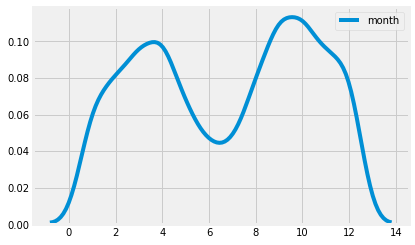

In [14]:
sns.kdeplot(x['month'])

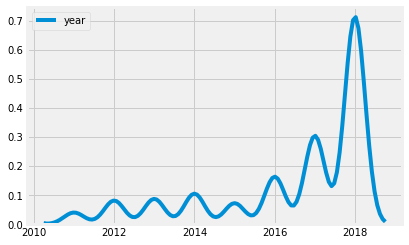

In [15]:
sns.kdeplot(x['year'])

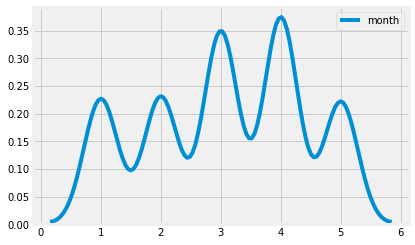

In [16]:
sns.kdeplot(x_test['month'])

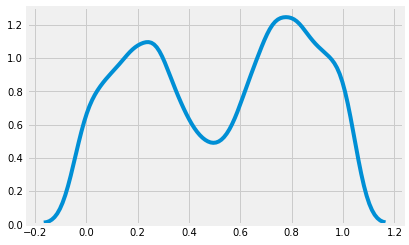

In [17]:
from sklearn.preprocessing import minmax_scale, scale
sns.kdeplot(minmax_scale(x['month']))

In [18]:
com=[x,x_test]
for i in com:
    i['month']=minmax_scale(i['month'])
x.head()
x_test.head()

,game_id,date,win_percentage,home_team,away_team,home_team_recent_10,away_team_recent_10,result,year,month
0,0,2013-11-26,1.85 (45.9%) 3.30 (25.8%) 3.00 (28.3%),포항스틸,FC서울,5승4무1패,3승4무3패,1,2013,0.909091
1,1,2013-11-26,3.60 (23.6%) 3.30 (25.8%) 1.68 (50.6%),부산아이,울산현대,2승2무6패,8승1무1패,1,2013,0.909091
2,3,2013-11-26,2.50 (34%) 3.10 (27.4%) 2.20 (38.6%),수원삼성,전북현대,2승3무5패,4승2무4패,1,2013,0.909091
3,5,2013-11-26,2.11 (40.3%) 2.90 (29.3%) 2.80 (30.4%),전남드래,성남FC,3승2무5패,4승2무4패,0,2013,0.909091
4,6,2013-11-27,6.40 (13.3%) 3.90 (21.8%) 1.31 (64.9%),C모스크,바이뮌헨,5승0무5패,9승1무0패,0,2013,0.909091


,game_id,date,win_percentage,home_team,away_team,home_team_recent_10,away_team_recent_10,year,month
0,11941,2019-01-01,5.20 (16.8%) 3.90 (22.3%) 1.43 (60.9%),뉴캐슬,맨체스U,4승3무3패,5승3무2패,2019,0.0
1,11944,2019-01-01,1.85 (47%) 3.05 (28.5%) 3.55 (24.5%),울버햄턴,크리스탈,4승2무4패,3승2무5패,2019,0.0
2,11945,2019-01-01,2.01 (43.3%) 2.95 (29.5%) 3.20 (27.2%),에버턴,레스터,3승3무4패,3승4무3패,2019,0.0
3,11946,2019-01-01,2.18 (39.9%) 2.75 (31.6%) 3.05 (28.5%),허더즈필,번리,2승1무7패,2승1무7패,2019,0.0
4,11947,2019-01-01,1.26 (69%) 4.60 (18.9%) 7.20 (12.1%),아스널,풀럼,5승2무3패,2승3무5패,2019,0.0


In [19]:
x['year'].value_counts()

2018    4257
2017    1811
2016     972
2014     624
2013     519
2012     486
2015     430
2011     241
Name: year, dtype: int64

In [20]:
l1=[2011,2012,2013,2014,2015,2016,2017,2018,2019]
l1=minmax_scale(l1)

In [21]:
dd={2011:l1[0],2012:l1[1],2013:l1[2],2014:l1[3],2015:l1[4],2016:l1[5],2017:l1[6],2018:l1[7],2019:l1[8]}
dd

{2011: 0.0,
 2012: 0.125,
 2013: 0.25,
 2014: 0.375,
 2015: 0.5,
 2016: 0.625,
 2017: 0.75,
 2018: 0.875,
 2019: 1.0}

In [22]:
def dddd(x):
    return dd[x]
com=[x,x_test]
for i in com:
    i['year']=i['year'].map(dddd)
x.head()
x_test.head()

,game_id,date,win_percentage,home_team,away_team,home_team_recent_10,away_team_recent_10,result,year,month
0,0,2013-11-26,1.85 (45.9%) 3.30 (25.8%) 3.00 (28.3%),포항스틸,FC서울,5승4무1패,3승4무3패,1,0.25,0.909091
1,1,2013-11-26,3.60 (23.6%) 3.30 (25.8%) 1.68 (50.6%),부산아이,울산현대,2승2무6패,8승1무1패,1,0.25,0.909091
2,3,2013-11-26,2.50 (34%) 3.10 (27.4%) 2.20 (38.6%),수원삼성,전북현대,2승3무5패,4승2무4패,1,0.25,0.909091
3,5,2013-11-26,2.11 (40.3%) 2.90 (29.3%) 2.80 (30.4%),전남드래,성남FC,3승2무5패,4승2무4패,0,0.25,0.909091
4,6,2013-11-27,6.40 (13.3%) 3.90 (21.8%) 1.31 (64.9%),C모스크,바이뮌헨,5승0무5패,9승1무0패,0,0.25,0.909091


,game_id,date,win_percentage,home_team,away_team,home_team_recent_10,away_team_recent_10,year,month
0,11941,2019-01-01,5.20 (16.8%) 3.90 (22.3%) 1.43 (60.9%),뉴캐슬,맨체스U,4승3무3패,5승3무2패,1.0,0.0
1,11944,2019-01-01,1.85 (47%) 3.05 (28.5%) 3.55 (24.5%),울버햄턴,크리스탈,4승2무4패,3승2무5패,1.0,0.0
2,11945,2019-01-01,2.01 (43.3%) 2.95 (29.5%) 3.20 (27.2%),에버턴,레스터,3승3무4패,3승4무3패,1.0,0.0
3,11946,2019-01-01,2.18 (39.9%) 2.75 (31.6%) 3.05 (28.5%),허더즈필,번리,2승1무7패,2승1무7패,1.0,0.0
4,11947,2019-01-01,1.26 (69%) 4.60 (18.9%) 7.20 (12.1%),아스널,풀럼,5승2무3패,2승3무5패,1.0,0.0


In [23]:
home_team=x.groupby(['home_team','year'])['result'].mean().reset_index(name='result_mean')
home_team.head()

,home_team,year,result_mean
0,AC밀란,0.000,1.0
1,AC밀란,0.125,0.8
2,AC밀란,0.250,1.0
3,AC밀란,0.375,1.0
4,AC밀란,0.625,0.0


In [24]:
home_team['year']=home_team['year']+1

In [25]:
x=pd.merge(x,home_team,on=['home_team','year'],how='left')
x['result_mean']=x['result_mean'].fillna(-1)
x.isna().sum()

game_id                   0
date                      0
win_percentage            0
home_team                 0
away_team                 0
home_team_recent_10    1680
away_team_recent_10    1680
result                    0
year                      0
month                     0
result_mean               0
dtype: int64

In [26]:
x_test=pd.merge(x_test,home_team,on=['home_team','year'],how='left')
x_test['result_mean']=x_test['result_mean'].fillna(-1)
x_test.isna().sum()

game_id                  0
date                     0
win_percentage           0
home_team                0
away_team                0
home_team_recent_10    307
away_team_recent_10    307
year                     0
month                    0
result_mean              0
dtype: int64

## home_team_recent_10 & away_team_recent_10

home has '.'

away has '무패승, 패승무'

In [27]:
x['home_team_recent_10'].unique()
x['away_team_recent_10'].unique()
x_test['home_team_recent_10'].unique()
x_test['away_team_recent_10'].unique()

array(['5승4무1패', '2승2무6패', '2승3무5패', '3승2무5패', '5승0무5패', nan, '4승2무4패',
       '7승1무2패', '8승2무0패', '3승1무6패', '4승4무2패', '5승1무4패', '5승3무2패',
       '2승1무7패', '4승3무3패', '3승5무2패', '6승1무3패', '5승2무3패', '4승1무5패',
       '2승4무4패', '3승0무7패', '1승5무4패', '1.001.003승', '6승3무1패', '2승5무3패',
       '2승0무8패', '3승3무4패', '6승0무4패', '1.001.006승', '7승2무1패', '0승2무8패',
       '1승4무5패', '6승2무2패', '8승1무1패', '1승2무7패', '6승4무0패', '3승4무3패',
       '4승5무1패', '1.001.004승', '1승3무6패', '9승1무0패', '1승0무9패', '8승0무2패',
       '0승3무7패', '4승0무6패', '0승5무5패', '1승1무8패', '7승0무3패', '9승0무1패',
       '0승4무6패', '7승3무0패', '4승6무0패', '2승6무2패', '3.805.305승', '1승6무3패',
       '3승6무1패', '5승5무0패', '0승1무9패', '1승7무2패', '0승6무4패', '2승2무2패',
       '0승4무3패', '3.102.406승', '3.052.501승', '4.301.311승', '3승7무0패',
       '3.002.456승', '0승4무5패', '2승7무1패', '3승2무4패', '10승0무0패',
       '3.003.303승', '0승7무3패', '3.153.453승', '2.702.702승', '1승0무1패',
       '2승0무2패', '1.001.002승', '2승0무4패', '0승0무1패', '1승0무0패', '0승0무2패',
       '2승0무7패', '3승2무1패', '4.356.909승

array(['3승4무3패', '8승1무1패', '4승2무4패', '9승1무0패', nan, '7승2무1패', '4승4무2패',
       '6승0무4패', '2승3무5패', '2승4무4패', '5승4무1패', '1승6무3패', '4승0무6패',
       '6승1무3패', '3승3무4패', '8승0무2패', '8승2무0패', '1승4무5패', '7승1무2패',
       '5승3무2패', '2승0무8패', '3무4패4승', '5승1무4패', '3승1무6패', '2승2무6패',
       '5승2무3패', '1무3패8승', '6승2무2패', '4승3무3패', '2승6무2패', '0승2무8패',
       '3승2무5패', '1승3무6패', '3승5무2패', '7승0무3패', '5승5무0패', '1승2무7패',
       '9승0무1패', '2무4패3승', '1승5무4패', '0승6무4패', '4승1무5패', '4무3패3승',
       '1무5패6승', '6승3무1패', '1승1무8패', '2승1무7패', '5승1무2패', '2승5무3패',
       '0승5무5패', '5승0무5패', '7승3무0패', '1승7무2패', '0승7무3패', '0승1무5패',
       '0승4무6패', '6승4무0패', '4무1패2승', '4승5무1패', '3승0무7패', '10승0무0패',
       '0승3무7패', '2승7무1패', '3승0무5패', '2승8무0패', '3승6무1패', '2무2패6승',
       '2무7패4승', '5무4패4승', '1승0무9패', '0승0무10패', '1승8무1패', '0승1무9패',
       '2승4무2패', '1승3무3패', '0무4패3승', '2무5패2승', '4승6무0패', '5무2패3승',
       '3무5패5승', '2승0무1패', '2승1무6패', '5무3패7승', '2승0무5패', '3승0무4패',
       '2승1무0패', '2승0무3패', '1승1무0패', '1무0패4승', '1무8패1승'

array(['4승3무3패', '4승2무4패', '3승3무4패', '2승1무7패', '5승2무3패', '4승1무5패',
       '0승3무7패', nan, '7승1무2패', '5승4무1패', '4승4무2패', '6승1무3패', '3승4무3패',
       '1승5무4패', '2승4무4패', '6승2무2패', '2승2무6패', '4승5무1패', '5승3무2패',
       '3승2무5패', '3승5무2패', '4승0무6패', '2승3무5패', '5승1무4패', '8승1무1패',
       '3승6무1패', '7승2무1패', '5승5무0패', '1승7무2패', '6승4무0패', '1승2무7패',
       '3승0무7패', '8승0무2패', '1승4무5패', '0승1무9패', '1승6무3패', '1승3무6패',
       '2승6무2패', '3승1무6패', '6승0무4패', '9승1무0패', '6승3무1패', '0승4무6패',
       '3.153.454승', '0승5무5패', '2승5무3패', '2승0무8패', '9승0무1패', '7승0무3패',
       '4승6무0패', '5승0무5패', '1승1무8패', '0승2무8패', '7승3무0패', '2승7무1패',
       '1승0무9패', '0승0무10패', '8승2무0패', '3.152.653승', '3.102.906승'],
      dtype=object)

array(['5승3무2패', '3승2무5패', '3승4무3패', '2승1무7패', '2승3무5패', '7승1무2패',
       '9승0무1패', '3승6무1패', '6승3무1패', '2승2무6패', '6승2무2패', nan, '4승5무1패',
       '3승5무2패', '5승2무3패', '3승3무4패', '4승3무3패', '5승4무1패', '1승1무8패',
       '2승6무2패', '5승1무4패', '2승4무4패', '4승4무2패', '1승3무6패', '6승1무3패',
       '8승0무2패', '2승5무3패', '3승1무6패', '4승1무5패', '7승2무1패', '4승2무4패',
       '5승5무0패', '1승6무3패', '8승1무1패', '1승2무7패', '0승3무7패', '3승0무7패',
       '0승6무4패', '0승5무5패', '7승3무0패', '5승0무5패', '9승1무0패', '1승4무5패',
       '6승4무0패', '2승0무8패', '8승2무0패', '0승1무9패', '3무3패7승', '0승2무8패',
       '4승0무6패', '6승0무4패', '7승0무3패', '0승7무3패', '0승4무6패', '2승7무1패',
       '4승6무0패', '1승5무4패', '10승0무0패', '1승0무9패', '1무6패5승', '1승7무2패',
       '1승8무1패', '3무1패9승'], dtype=object)

In [28]:
x['home_team_recent_10'].str.split('승',expand=True).head(10)
x['home_team_recent_10'].str.split('패',expand=True).head(10)

,0,1
0,5,4무1패
1,2,2무6패
2,2,3무5패
3,3,2무5패
4,5,0무5패
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


,0,1
0,5승4무1,
1,2승2무6,
2,2승3무5,
3,3승2무5,
4,5승0무5,
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [29]:
x['home_team_recent_10'].str.split('승',expand=True)[0][5]
type(np.NaN)

nan

float

(array([201., 135., 199.,  82.,  69., 115.,  24., 134., 181., 217., 249.,
         74.]),
 array([0.        , 0.08333333, 0.16666667, 0.25      , 0.33333333,
        0.41666667, 0.5       , 0.58333333, 0.66666667, 0.75      ,
        0.83333333, 0.91666667, 1.        ]),
 <a list of 12 Patch objects>)

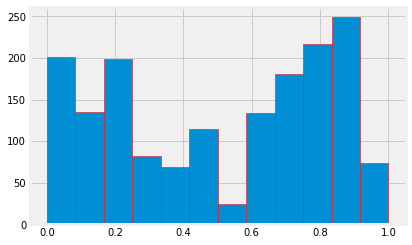

In [30]:
plt.hist(x[x['home_team_recent_10'].isna()]['month'],bins=12,edgecolor='r')

In [31]:
def hw(x):
    if type(x)==float:
        return 0
    elif '.' in x.split('승')[0]:
        return np.nan
    elif x.split('승')[0][-2:]=='10':
        return x.split('승')[0][-2:]
    else:
        return x.split('승')[0][-1]
def ht(x):
    if type(x)==float:
        return 0
    elif '.' in x.split('승')[0]:
        return np.nan
    elif x.split('무')[0][-2:]=='10':
        return x.split('무')[0][-2:]
    else:
        return x.split('무')[0][-1]
def hl(x):
    if type(x)==float:
        return 0
    elif '.' in x.split('승')[0]:
        return np.nan
    elif x.split('패')[0][-2:]=='10':
        return x.split('패')[0][-2:]
    else:
        return x.split('패')[0][-1]
def aw(x):
    if type(x)==float:
        return 0
    elif x.split('승')[0][-2:]=='10':
        return x.split('승')[0][-2:]
    else:
        return x.split('승')[0][-1]
def at(x):
    if type(x)==float:
        return 0
    elif x.split('무')[0][-2:]=='10':
            return x.split('무')[0][-2:]
    else:
        return x.split('무')[0][-1]
def al(x):
    if type(x)==float:
        return 0
    elif x.split('패')[0][-2:]=='10':
        return x.split('패')[0][-2:]
    else:
        return x.split('패')[0][-1]

In [32]:
com=[x,x_test]
for i in com:
    i['home_win']=i['home_team_recent_10'].map(hw).astype(float)
    i['home_tie']=i['home_team_recent_10'].map(ht).astype(float)
    i['home_lost']=i['home_team_recent_10'].map(hl).astype(float)
x['home_win'].value_counts()
x['home_tie'].value_counts()
x['home_lost'].value_counts()
x.isna().sum()
x_test.isna().sum()
x.head()
x_test.head()

0.0     1857
3.0     1476
4.0     1446
2.0     1266
5.0     1132
6.0      757
1.0      622
7.0      440
8.0      215
9.0       80
10.0       8
Name: home_win, dtype: int64

2.0    2131
0.0    2128
3.0    1881
1.0    1483
4.0    1082
5.0     455
6.0     117
7.0      22
Name: home_tie, dtype: int64

0.0     1934
3.0     1522
4.0     1460
5.0     1211
2.0     1151
6.0      754
1.0      713
7.0      402
8.0      129
9.0       22
10.0       1
Name: home_lost, dtype: int64

game_id                   0
date                      0
win_percentage            0
home_team                 0
away_team                 0
home_team_recent_10    1680
away_team_recent_10    1680
result                    0
year                      0
month                     0
result_mean               0
home_win                 41
home_tie                 41
home_lost                41
dtype: int64

game_id                  0
date                     0
win_percentage           0
home_team                0
away_team                0
home_team_recent_10    307
away_team_recent_10    307
year                     0
month                    0
result_mean              0
home_win                 7
home_tie                 7
home_lost                7
dtype: int64

,game_id,date,win_percentage,home_team,away_team,home_team_recent_10,away_team_recent_10,result,year,month,result_mean,home_win,home_tie,home_lost
0,0,2013-11-26,1.85 (45.9%) 3.30 (25.8%) 3.00 (28.3%),포항스틸,FC서울,5승4무1패,3승4무3패,1,0.25,0.909091,-1.0,5.0,4.0,1.0
1,1,2013-11-26,3.60 (23.6%) 3.30 (25.8%) 1.68 (50.6%),부산아이,울산현대,2승2무6패,8승1무1패,1,0.25,0.909091,-1.0,2.0,2.0,6.0
2,3,2013-11-26,2.50 (34%) 3.10 (27.4%) 2.20 (38.6%),수원삼성,전북현대,2승3무5패,4승2무4패,1,0.25,0.909091,-1.0,2.0,3.0,5.0
3,5,2013-11-26,2.11 (40.3%) 2.90 (29.3%) 2.80 (30.4%),전남드래,성남FC,3승2무5패,4승2무4패,0,0.25,0.909091,-1.0,3.0,2.0,5.0
4,6,2013-11-27,6.40 (13.3%) 3.90 (21.8%) 1.31 (64.9%),C모스크,바이뮌헨,5승0무5패,9승1무0패,0,0.25,0.909091,-1.0,5.0,0.0,5.0


,game_id,date,win_percentage,home_team,away_team,home_team_recent_10,away_team_recent_10,year,month,result_mean,home_win,home_tie,home_lost
0,11941,2019-01-01,5.20 (16.8%) 3.90 (22.3%) 1.43 (60.9%),뉴캐슬,맨체스U,4승3무3패,5승3무2패,1.0,0.0,-1.0,4.0,3.0,3.0
1,11944,2019-01-01,1.85 (47%) 3.05 (28.5%) 3.55 (24.5%),울버햄턴,크리스탈,4승2무4패,3승2무5패,1.0,0.0,-1.0,4.0,2.0,4.0
2,11945,2019-01-01,2.01 (43.3%) 2.95 (29.5%) 3.20 (27.2%),에버턴,레스터,3승3무4패,3승4무3패,1.0,0.0,1.0,3.0,3.0,4.0
3,11946,2019-01-01,2.18 (39.9%) 2.75 (31.6%) 3.05 (28.5%),허더즈필,번리,2승1무7패,2승1무7패,1.0,0.0,-1.0,2.0,1.0,7.0
4,11947,2019-01-01,1.26 (69%) 4.60 (18.9%) 7.20 (12.1%),아스널,풀럼,5승2무3패,2승3무5패,1.0,0.0,1.0,5.0,2.0,3.0


In [33]:
com=[x,x_test]
for i in com:
    i['away_win']=i['away_team_recent_10'].map(aw).astype(float)
    i['away_tie']=i['away_team_recent_10'].map(at).astype(float)
    i['away_lost']=i['away_team_recent_10'].map(al).astype(float)
x['away_win'].value_counts()
x['away_tie'].value_counts()
x['away_lost'].value_counts()
x.isna().sum()
x_test.isna().sum()
x.head()
x_test.head()

0.0     1867
4.0     1505
3.0     1470
5.0     1192
2.0     1020
6.0      905
1.0      510
7.0      472
8.0      287
9.0      103
10.0       9
Name: away_win, dtype: int64

2.0    2151
0.0    2132
3.0    1911
1.0    1473
4.0    1078
5.0     428
6.0     142
7.0      20
8.0       5
Name: away_tie, dtype: int64

0.0     1992
3.0     1551
4.0     1469
2.0     1372
5.0     1084
1.0      780
6.0      694
7.0      294
8.0       84
9.0       18
10.0       2
Name: away_lost, dtype: int64

game_id                   0
date                      0
win_percentage            0
home_team                 0
away_team                 0
home_team_recent_10    1680
away_team_recent_10    1680
result                    0
year                      0
month                     0
result_mean               0
home_win                 41
home_tie                 41
home_lost                41
away_win                  0
away_tie                  0
away_lost                 0
dtype: int64

game_id                  0
date                     0
win_percentage           0
home_team                0
away_team                0
home_team_recent_10    307
away_team_recent_10    307
year                     0
month                    0
result_mean              0
home_win                 7
home_tie                 7
home_lost                7
away_win                 0
away_tie                 0
away_lost                0
dtype: int64

,game_id,date,win_percentage,home_team,away_team,home_team_recent_10,away_team_recent_10,result,year,month,result_mean,home_win,home_tie,home_lost,away_win,away_tie,away_lost
0,0,2013-11-26,1.85 (45.9%) 3.30 (25.8%) 3.00 (28.3%),포항스틸,FC서울,5승4무1패,3승4무3패,1,0.25,0.909091,-1.0,5.0,4.0,1.0,3.0,4.0,3.0
1,1,2013-11-26,3.60 (23.6%) 3.30 (25.8%) 1.68 (50.6%),부산아이,울산현대,2승2무6패,8승1무1패,1,0.25,0.909091,-1.0,2.0,2.0,6.0,8.0,1.0,1.0
2,3,2013-11-26,2.50 (34%) 3.10 (27.4%) 2.20 (38.6%),수원삼성,전북현대,2승3무5패,4승2무4패,1,0.25,0.909091,-1.0,2.0,3.0,5.0,4.0,2.0,4.0
3,5,2013-11-26,2.11 (40.3%) 2.90 (29.3%) 2.80 (30.4%),전남드래,성남FC,3승2무5패,4승2무4패,0,0.25,0.909091,-1.0,3.0,2.0,5.0,4.0,2.0,4.0
4,6,2013-11-27,6.40 (13.3%) 3.90 (21.8%) 1.31 (64.9%),C모스크,바이뮌헨,5승0무5패,9승1무0패,0,0.25,0.909091,-1.0,5.0,0.0,5.0,9.0,1.0,0.0


,game_id,date,win_percentage,home_team,away_team,home_team_recent_10,away_team_recent_10,year,month,result_mean,home_win,home_tie,home_lost,away_win,away_tie,away_lost
0,11941,2019-01-01,5.20 (16.8%) 3.90 (22.3%) 1.43 (60.9%),뉴캐슬,맨체스U,4승3무3패,5승3무2패,1.0,0.0,-1.0,4.0,3.0,3.0,5.0,3.0,2.0
1,11944,2019-01-01,1.85 (47%) 3.05 (28.5%) 3.55 (24.5%),울버햄턴,크리스탈,4승2무4패,3승2무5패,1.0,0.0,-1.0,4.0,2.0,4.0,3.0,2.0,5.0
2,11945,2019-01-01,2.01 (43.3%) 2.95 (29.5%) 3.20 (27.2%),에버턴,레스터,3승3무4패,3승4무3패,1.0,0.0,1.0,3.0,3.0,4.0,3.0,4.0,3.0
3,11946,2019-01-01,2.18 (39.9%) 2.75 (31.6%) 3.05 (28.5%),허더즈필,번리,2승1무7패,2승1무7패,1.0,0.0,-1.0,2.0,1.0,7.0,2.0,1.0,7.0
4,11947,2019-01-01,1.26 (69%) 4.60 (18.9%) 7.20 (12.1%),아스널,풀럼,5승2무3패,2승3무5패,1.0,0.0,1.0,5.0,2.0,3.0,2.0,3.0,5.0


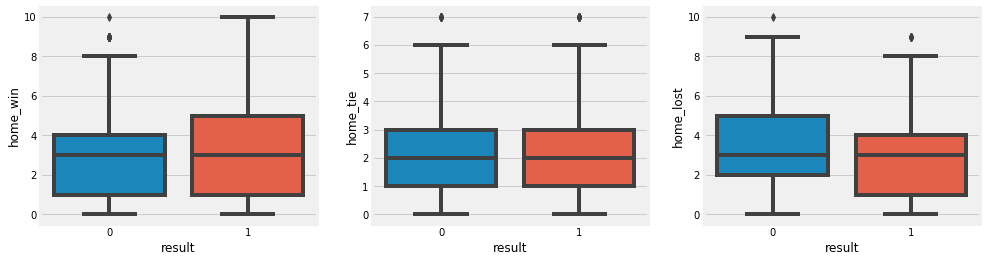

In [34]:
features=['home_win','home_tie','home_lost']
fig,ax=plt.subplots(1,3,figsize=(15,4))
for i in range(3):
    sns.boxplot(x=y,y=x[features[i]],ax=ax[i])

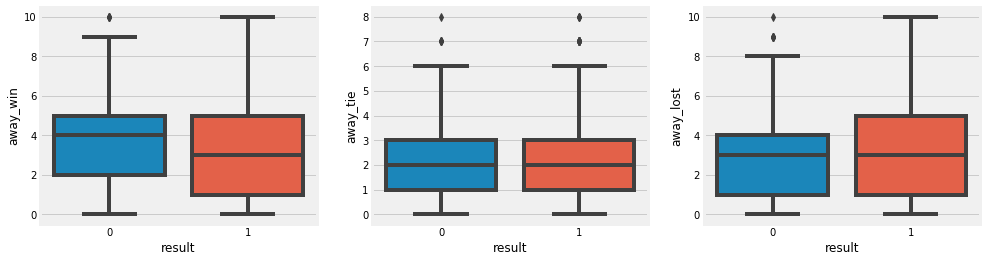

In [35]:
features=['away_win','away_tie','away_lost']
fig,ax=plt.subplots(1,3,figsize=(15,4))
for i in range(3):
    sns.boxplot(x=y,y=x[features[i]],ax=ax[i])

In [36]:
x['home_sub']=x['home_win']-x['home_lost']
x['away_sub']=x['away_win']-x['away_lost']
x_test['home_sub']=x_test['home_win']-x_test['home_lost']
x_test['away_sub']=x_test['away_win']-x_test['away_lost']
x.isna().sum()

game_id                   0
date                      0
win_percentage            0
home_team                 0
away_team                 0
home_team_recent_10    1680
away_team_recent_10    1680
result                    0
year                      0
month                     0
result_mean               0
home_win                 41
home_tie                 41
home_lost                41
away_win                  0
away_tie                  0
away_lost                 0
home_sub                 41
away_sub                  0
dtype: int64

In [37]:
com=[x,x_test]
for i in com:
    i['home_win']=minmax_scale(i['home_win'])
    i['home_tie']=minmax_scale(i['home_tie'])
    i['home_lost']=minmax_scale(i['home_lost'])
    i['away_win']=minmax_scale(i['away_win'])
    i['away_tie']=minmax_scale(i['away_tie'])
    i['away_lost']=minmax_scale(i['away_lost'])
x.head()
x_test.head()

,game_id,date,win_percentage,home_team,away_team,home_team_recent_10,away_team_recent_10,result,year,month,result_mean,home_win,home_tie,home_lost,away_win,away_tie,away_lost,home_sub,away_sub
0,0,2013-11-26,1.85 (45.9%) 3.30 (25.8%) 3.00 (28.3%),포항스틸,FC서울,5승4무1패,3승4무3패,1,0.25,0.909091,-1.0,0.5,0.571429,0.1,0.3,0.500,0.3,4.0,0.0
1,1,2013-11-26,3.60 (23.6%) 3.30 (25.8%) 1.68 (50.6%),부산아이,울산현대,2승2무6패,8승1무1패,1,0.25,0.909091,-1.0,0.2,0.285714,0.6,0.8,0.125,0.1,-4.0,7.0
2,3,2013-11-26,2.50 (34%) 3.10 (27.4%) 2.20 (38.6%),수원삼성,전북현대,2승3무5패,4승2무4패,1,0.25,0.909091,-1.0,0.2,0.428571,0.5,0.4,0.250,0.4,-3.0,0.0
3,5,2013-11-26,2.11 (40.3%) 2.90 (29.3%) 2.80 (30.4%),전남드래,성남FC,3승2무5패,4승2무4패,0,0.25,0.909091,-1.0,0.3,0.285714,0.5,0.4,0.250,0.4,-2.0,0.0
4,6,2013-11-27,6.40 (13.3%) 3.90 (21.8%) 1.31 (64.9%),C모스크,바이뮌헨,5승0무5패,9승1무0패,0,0.25,0.909091,-1.0,0.5,0.000000,0.5,0.9,0.125,0.0,0.0,9.0


,game_id,date,win_percentage,home_team,away_team,home_team_recent_10,away_team_recent_10,year,month,result_mean,home_win,home_tie,home_lost,away_win,away_tie,away_lost,home_sub,away_sub
0,11941,2019-01-01,5.20 (16.8%) 3.90 (22.3%) 1.43 (60.9%),뉴캐슬,맨체스U,4승3무3패,5승3무2패,1.0,0.0,-1.0,0.444444,0.428571,0.3,0.5,0.375,0.222222,1.0,3.0
1,11944,2019-01-01,1.85 (47%) 3.05 (28.5%) 3.55 (24.5%),울버햄턴,크리스탈,4승2무4패,3승2무5패,1.0,0.0,-1.0,0.444444,0.285714,0.4,0.3,0.250,0.555556,0.0,-2.0
2,11945,2019-01-01,2.01 (43.3%) 2.95 (29.5%) 3.20 (27.2%),에버턴,레스터,3승3무4패,3승4무3패,1.0,0.0,1.0,0.333333,0.428571,0.4,0.3,0.500,0.333333,-1.0,0.0
3,11946,2019-01-01,2.18 (39.9%) 2.75 (31.6%) 3.05 (28.5%),허더즈필,번리,2승1무7패,2승1무7패,1.0,0.0,-1.0,0.222222,0.142857,0.7,0.2,0.125,0.777778,-5.0,-5.0
4,11947,2019-01-01,1.26 (69%) 4.60 (18.9%) 7.20 (12.1%),아스널,풀럼,5승2무3패,2승3무5패,1.0,0.0,1.0,0.555556,0.285714,0.3,0.2,0.375,0.555556,2.0,-3.0


In [38]:
com=[x,x_test]
for i in com:
    i['home_win']=i['home_win'].fillna(-1)
    i['home_tie']=i['home_tie'].fillna(-1)
    i['home_lost']=i['home_lost'].fillna(-1)
x['home_win'].value_counts()
x['home_tie'].value_counts()
x['home_lost'].value_counts()
x.isna().sum()
x_test.isna().sum()
x.head()
x_test.head()

 0.0    1857
 0.3    1476
 0.4    1446
 0.2    1266
 0.5    1132
 0.6     757
 0.1     622
 0.7     440
 0.8     215
 0.9      80
-1.0      41
 1.0       8
Name: home_win, dtype: int64

 0.285714    2131
 0.000000    2128
 0.428571    1881
 0.142857    1483
 0.571429    1082
 0.714286     455
 0.857143     117
-1.000000      41
 1.000000      22
Name: home_tie, dtype: int64

 0.0    1934
 0.3    1522
 0.4    1460
 0.5    1211
 0.2    1151
 0.6     754
 0.1     713
 0.7     402
 0.8     129
-1.0      41
 0.9      22
 1.0       1
Name: home_lost, dtype: int64

game_id                   0
date                      0
win_percentage            0
home_team                 0
away_team                 0
home_team_recent_10    1680
away_team_recent_10    1680
result                    0
year                      0
month                     0
result_mean               0
home_win                  0
home_tie                  0
home_lost                 0
away_win                  0
away_tie                  0
away_lost                 0
home_sub                 41
away_sub                  0
dtype: int64

game_id                  0
date                     0
win_percentage           0
home_team                0
away_team                0
home_team_recent_10    307
away_team_recent_10    307
year                     0
month                    0
result_mean              0
home_win                 0
home_tie                 0
home_lost                0
away_win                 0
away_tie                 0
away_lost                0
home_sub                 7
away_sub                 0
dtype: int64

,game_id,date,win_percentage,home_team,away_team,home_team_recent_10,away_team_recent_10,result,year,month,result_mean,home_win,home_tie,home_lost,away_win,away_tie,away_lost,home_sub,away_sub
0,0,2013-11-26,1.85 (45.9%) 3.30 (25.8%) 3.00 (28.3%),포항스틸,FC서울,5승4무1패,3승4무3패,1,0.25,0.909091,-1.0,0.5,0.571429,0.1,0.3,0.500,0.3,4.0,0.0
1,1,2013-11-26,3.60 (23.6%) 3.30 (25.8%) 1.68 (50.6%),부산아이,울산현대,2승2무6패,8승1무1패,1,0.25,0.909091,-1.0,0.2,0.285714,0.6,0.8,0.125,0.1,-4.0,7.0
2,3,2013-11-26,2.50 (34%) 3.10 (27.4%) 2.20 (38.6%),수원삼성,전북현대,2승3무5패,4승2무4패,1,0.25,0.909091,-1.0,0.2,0.428571,0.5,0.4,0.250,0.4,-3.0,0.0
3,5,2013-11-26,2.11 (40.3%) 2.90 (29.3%) 2.80 (30.4%),전남드래,성남FC,3승2무5패,4승2무4패,0,0.25,0.909091,-1.0,0.3,0.285714,0.5,0.4,0.250,0.4,-2.0,0.0
4,6,2013-11-27,6.40 (13.3%) 3.90 (21.8%) 1.31 (64.9%),C모스크,바이뮌헨,5승0무5패,9승1무0패,0,0.25,0.909091,-1.0,0.5,0.000000,0.5,0.9,0.125,0.0,0.0,9.0


,game_id,date,win_percentage,home_team,away_team,home_team_recent_10,away_team_recent_10,year,month,result_mean,home_win,home_tie,home_lost,away_win,away_tie,away_lost,home_sub,away_sub
0,11941,2019-01-01,5.20 (16.8%) 3.90 (22.3%) 1.43 (60.9%),뉴캐슬,맨체스U,4승3무3패,5승3무2패,1.0,0.0,-1.0,0.444444,0.428571,0.3,0.5,0.375,0.222222,1.0,3.0
1,11944,2019-01-01,1.85 (47%) 3.05 (28.5%) 3.55 (24.5%),울버햄턴,크리스탈,4승2무4패,3승2무5패,1.0,0.0,-1.0,0.444444,0.285714,0.4,0.3,0.250,0.555556,0.0,-2.0
2,11945,2019-01-01,2.01 (43.3%) 2.95 (29.5%) 3.20 (27.2%),에버턴,레스터,3승3무4패,3승4무3패,1.0,0.0,1.0,0.333333,0.428571,0.4,0.3,0.500,0.333333,-1.0,0.0
3,11946,2019-01-01,2.18 (39.9%) 2.75 (31.6%) 3.05 (28.5%),허더즈필,번리,2승1무7패,2승1무7패,1.0,0.0,-1.0,0.222222,0.142857,0.7,0.2,0.125,0.777778,-5.0,-5.0
4,11947,2019-01-01,1.26 (69%) 4.60 (18.9%) 7.20 (12.1%),아스널,풀럼,5승2무3패,2승3무5패,1.0,0.0,1.0,0.555556,0.285714,0.3,0.2,0.375,0.555556,2.0,-3.0


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

nan

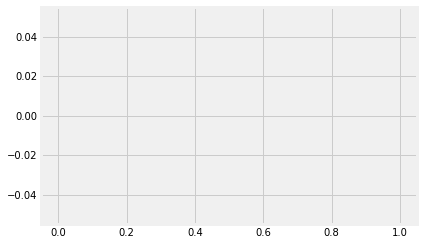

In [39]:
# plt.hist(x.loc[list(x[x['home_win'].isna()].index),'away_sub'])
# x.loc[list(x[x['home_win'].isna()].index),'away_sub'].min()

In [41]:
com=[x,x_test]
for i in com:
    i['home_sub']=scale(i['home_sub'])
    i['away_sub']=scale(i['away_sub'])
    i['home_sub']=i['home_sub'].fillna(-10)
    i['away_sub']=i['away_sub'].fillna(-10)
x.head()

,game_id,date,win_percentage,home_team,away_team,home_team_recent_10,away_team_recent_10,result,year,month,result_mean,home_win,home_tie,home_lost,away_win,away_tie,away_lost,home_sub,away_sub
0,0,2013-11-26,1.85 (45.9%) 3.30 (25.8%) 3.00 (28.3%),포항스틸,FC서울,5승4무1패,3승4무3패,1,0.25,0.909091,-1.0,0.5,0.571429,0.1,0.3,0.500,0.3,1.049939,-0.148668
1,1,2013-11-26,3.60 (23.6%) 3.30 (25.8%) 1.68 (50.6%),부산아이,울산현대,2승2무6패,8승1무1패,1,0.25,0.909091,-1.0,0.2,0.285714,0.6,0.8,0.125,0.1,-1.039157,2.041494
2,3,2013-11-26,2.50 (34%) 3.10 (27.4%) 2.20 (38.6%),수원삼성,전북현대,2승3무5패,4승2무4패,1,0.25,0.909091,-1.0,0.2,0.428571,0.5,0.4,0.250,0.4,-0.778020,-0.148668
3,5,2013-11-26,2.11 (40.3%) 2.90 (29.3%) 2.80 (30.4%),전남드래,성남FC,3승2무5패,4승2무4패,0,0.25,0.909091,-1.0,0.3,0.285714,0.5,0.4,0.250,0.4,-0.516883,-0.148668
4,6,2013-11-27,6.40 (13.3%) 3.90 (21.8%) 1.31 (64.9%),C모스크,바이뮌헨,5승0무5패,9승1무0패,0,0.25,0.909091,-1.0,0.5,0.000000,0.5,0.9,0.125,0.0,0.005391,2.667254


## win_percentage

In [42]:
x['win_percentage'].value_counts()

2.31 (37.2%) 3.10 (27.7%) 2.45 (35.1%)    21
2.02 (42.6%) 3.05 (28.2%) 2.95 (29.2%)    16
2.04 (42.2%) 3.05 (28.2%) 2.90 (29.7%)    16
2.35 (36.6%) 2.90 (29.7%) 2.55 (33.7%)    15
2.37 (36.3%) 3.00 (28.7%) 2.45 (35.1%)    15
2.55 (34.5%) 3.10 (28.4%) 2.37 (37.1%)    14
2.21 (38.9%) 3.00 (28.7%) 2.65 (32.5%)    14
1.00 (33.3%) 1.00 (33.3%) 1.00 (33.3%)    14
1.96 (43.3%) 3.10 (27.4%) 2.90 (29.3%)    14
2.31 (37.3%) 3.20 (26.9%) 2.40 (35.9%)    13
2.02 (42.6%) 3.00 (28.7%) 3.00 (28.7%)    13
2.13 (40.4%) 3.10 (27.7%) 2.70 (31.9%)    13
2.14 (40.2%) 2.95 (29.2%) 2.80 (30.7%)    13
1.58 (54.4%) 3.50 (24.6%) 4.10 (21%)      13
2.33 (37.8%) 3.10 (28.4%) 2.60 (33.8%)    12
2.02 (42.6%) 3.15 (27.3%) 2.85 (30.2%)    12
2.39 (36%) 2.90 (29.7%) 2.50 (34.4%)      12
2.40 (35.8%) 3.15 (27.3%) 2.33 (36.9%)    12
2.27 (37.9%) 3.10 (27.7%) 2.50 (34.4%)    12
1.95 (44.1%) 3.05 (28.2%) 3.10 (27.7%)    12
2.10 (41%) 3.10 (27.7%) 2.75 (31.3%)      12
1.95 (44.1%) 3.10 (27.7%) 3.05 (28.2%)    11
2.55 (34.5

In [43]:
def bt(x):
    if len(x.split('('))==3:
        return 0.1
    else:
        return x.split('(')[1].split(')')[1]
def bl(x):
    if len(x.split('('))==3:
        return x.split('(')[1].split(')')[1]
    else:
        return x.split('(')[2].split(')')[1]

In [44]:
x['win_percentage'].str.split('(',expand=True)[3].isna().sum()

240

In [45]:
com=[x,x_test]
for i in com:
    i['win_baedang']=i['win_percentage'].str.split('(',expand=True)[0].astype(float)
    i['tie_baedang']=i['win_percentage'].map(bt).astype(float)
    i['lost_baedang']=i['win_percentage'].map(bl).astype(float)
x.head()
x_test.head()
x[x['tie_baedang']==0.1].head()
x['win_baedang'].dtype

,game_id,date,win_percentage,home_team,away_team,home_team_recent_10,away_team_recent_10,result,year,month,...,home_tie,home_lost,away_win,away_tie,away_lost,home_sub,away_sub,win_baedang,tie_baedang,lost_baedang
0,0,2013-11-26,1.85 (45.9%) 3.30 (25.8%) 3.00 (28.3%),포항스틸,FC서울,5승4무1패,3승4무3패,1,0.25,0.909091,...,0.571429,0.1,0.3,0.500,0.3,1.049939,-0.148668,1.85,3.3,3.00
1,1,2013-11-26,3.60 (23.6%) 3.30 (25.8%) 1.68 (50.6%),부산아이,울산현대,2승2무6패,8승1무1패,1,0.25,0.909091,...,0.285714,0.6,0.8,0.125,0.1,-1.039157,2.041494,3.60,3.3,1.68
2,3,2013-11-26,2.50 (34%) 3.10 (27.4%) 2.20 (38.6%),수원삼성,전북현대,2승3무5패,4승2무4패,1,0.25,0.909091,...,0.428571,0.5,0.4,0.250,0.4,-0.778020,-0.148668,2.50,3.1,2.20
3,5,2013-11-26,2.11 (40.3%) 2.90 (29.3%) 2.80 (30.4%),전남드래,성남FC,3승2무5패,4승2무4패,0,0.25,0.909091,...,0.285714,0.5,0.4,0.250,0.4,-0.516883,-0.148668,2.11,2.9,2.80
4,6,2013-11-27,6.40 (13.3%) 3.90 (21.8%) 1.31 (64.9%),C모스크,바이뮌헨,5승0무5패,9승1무0패,0,0.25,0.909091,...,0.000000,0.5,0.9,0.125,0.0,0.005391,2.667254,6.40,3.9,1.31


,game_id,date,win_percentage,home_team,away_team,home_team_recent_10,away_team_recent_10,year,month,result_mean,...,home_tie,home_lost,away_win,away_tie,away_lost,home_sub,away_sub,win_baedang,tie_baedang,lost_baedang
0,11941,2019-01-01,5.20 (16.8%) 3.90 (22.3%) 1.43 (60.9%),뉴캐슬,맨체스U,4승3무3패,5승3무2패,1.0,0.0,-1.0,...,0.428571,0.3,0.5,0.375,0.222222,0.242646,0.782923,5.20,3.90,1.43
1,11944,2019-01-01,1.85 (47%) 3.05 (28.5%) 3.55 (24.5%),울버햄턴,크리스탈,4승2무4패,3승2무5패,1.0,0.0,-1.0,...,0.285714,0.4,0.3,0.250,0.555556,-0.025676,-0.696695,1.85,3.05,3.55
2,11945,2019-01-01,2.01 (43.3%) 2.95 (29.5%) 3.20 (27.2%),에버턴,레스터,3승3무4패,3승4무3패,1.0,0.0,1.0,...,0.428571,0.4,0.3,0.500,0.333333,-0.293999,-0.104848,2.01,2.95,3.20
3,11946,2019-01-01,2.18 (39.9%) 2.75 (31.6%) 3.05 (28.5%),허더즈필,번리,2승1무7패,2승1무7패,1.0,0.0,-1.0,...,0.142857,0.7,0.2,0.125,0.777778,-1.367289,-1.584466,2.18,2.75,3.05
4,11947,2019-01-01,1.26 (69%) 4.60 (18.9%) 7.20 (12.1%),아스널,풀럼,5승2무3패,2승3무5패,1.0,0.0,1.0,...,0.285714,0.3,0.2,0.375,0.555556,0.510969,-0.992619,1.26,4.60,7.20


,game_id,date,win_percentage,home_team,away_team,home_team_recent_10,away_team_recent_10,result,year,month,...,home_tie,home_lost,away_win,away_tie,away_lost,home_sub,away_sub,win_baedang,tie_baedang,lost_baedang
417,545,2014-06-17,1.90 (44.8%) 1.54 (55.3%),호주(U2.5),네덜란드,2승1무7패,6승3무1패,0,0.375,0.454545,...,0.142857,0.7,0.6,0.375,0.1,-1.300295,1.415733,1.90,0.1,1.54
418,546,2014-06-17,1.85 (45.9%) 1.57 (54.1%),스페인(U2.5),칠레,7승1무2패,6승2무2패,1,0.375,0.454545,...,0.142857,0.2,0.6,0.250,0.2,1.311077,1.102853,1.85,0.1,1.57
419,547,2014-06-17,1.64 (51.8%) 1.76 (48.2%),콜롬비아(U2.5),코트디부,5승4무1패,4승3무3패,0,0.375,0.454545,...,0.571429,0.1,0.4,0.375,0.3,1.049939,0.164212,1.64,0.1,1.76
452,589,2014-08-20,1.83 (46.5%) 1.59 (53.5%),웨시드니(U2.5),광저우E,NaN,NaN,1,0.375,0.636364,...,0.000000,0.0,0.0,0.000,0.0,0.005391,-0.148668,1.83,0.1,1.59
453,590,2014-08-20,1.56 (54.5%) 1.87 (45.5%),마리보르(U2.5),셀틱,NaN,NaN,1,0.375,0.636364,...,0.000000,0.0,0.0,0.000,0.0,0.005391,-0.148668,1.56,0.1,1.87


dtype('float64')

In [46]:
x['baedang_sub']=x['win_baedang']-x['lost_baedang']
x_test['baedang_sub']=x_test['win_baedang']-x_test['lost_baedang']
x.isna().sum()

game_id                   0
date                      0
win_percentage            0
home_team                 0
away_team                 0
home_team_recent_10    1680
away_team_recent_10    1680
result                    0
year                      0
month                     0
result_mean               0
home_win                  0
home_tie                  0
home_lost                 0
away_win                  0
away_tie                  0
away_lost                 0
home_sub                  0
away_sub                  0
win_baedang               0
tie_baedang               0
lost_baedang              0
baedang_sub               0
dtype: int64

In [47]:
x['win_percentage'].str.split('%',expand=True).head()

,0,1,2,3
0,1.85 (45.9,) 3.30 (25.8,) 3.00 (28.3,)
1,3.60 (23.6,) 3.30 (25.8,) 1.68 (50.6,)
2,2.50 (34,) 3.10 (27.4,) 2.20 (38.6,)
3,2.11 (40.3,) 2.90 (29.3,) 2.80 (30.4,)
4,6.40 (13.3,) 3.90 (21.8,) 1.31 (64.9,)


In [48]:
x['win_percentage'].str.split('%',expand=True)[0].str.split('(',expand=True)[1].head()

0    45.9
1    23.6
2      34
3    40.3
4    13.3
Name: 1, dtype: object

In [49]:
def pt(x):
    if len(x.split('%'))==3:
        return 0
    else:
        return x.split('%')[1].split('(')[1]
def pl(x):
    if len(x.split('%'))==3:
        return x.split('%')[1].split('(')[1]
    else:
        return x.split('%')[2].split('(')[1]

In [50]:
com=[x,x_test]
for i in com:
    i['win_pick_ratio']=i['win_percentage'].str.split('%',expand=True)[0].str.split('(',expand=True)[1].astype(float)
    i['tie_pick_ratio']=i['win_percentage'].map(pt).astype(float)
    i['lost_pick_ratio']=i['win_percentage'].map(pl).astype(float)
x.head()
x_test.head()
x[x['tie_pick_ratio']==0].head()
x['win_pick_ratio'].dtype
x_test['win_pick_ratio'].dtype

,game_id,date,win_percentage,home_team,away_team,home_team_recent_10,away_team_recent_10,result,year,month,...,away_lost,home_sub,away_sub,win_baedang,tie_baedang,lost_baedang,baedang_sub,win_pick_ratio,tie_pick_ratio,lost_pick_ratio
0,0,2013-11-26,1.85 (45.9%) 3.30 (25.8%) 3.00 (28.3%),포항스틸,FC서울,5승4무1패,3승4무3패,1,0.25,0.909091,...,0.3,1.049939,-0.148668,1.85,3.3,3.00,-1.15,45.9,25.8,28.3
1,1,2013-11-26,3.60 (23.6%) 3.30 (25.8%) 1.68 (50.6%),부산아이,울산현대,2승2무6패,8승1무1패,1,0.25,0.909091,...,0.1,-1.039157,2.041494,3.60,3.3,1.68,1.92,23.6,25.8,50.6
2,3,2013-11-26,2.50 (34%) 3.10 (27.4%) 2.20 (38.6%),수원삼성,전북현대,2승3무5패,4승2무4패,1,0.25,0.909091,...,0.4,-0.778020,-0.148668,2.50,3.1,2.20,0.30,34.0,27.4,38.6
3,5,2013-11-26,2.11 (40.3%) 2.90 (29.3%) 2.80 (30.4%),전남드래,성남FC,3승2무5패,4승2무4패,0,0.25,0.909091,...,0.4,-0.516883,-0.148668,2.11,2.9,2.80,-0.69,40.3,29.3,30.4
4,6,2013-11-27,6.40 (13.3%) 3.90 (21.8%) 1.31 (64.9%),C모스크,바이뮌헨,5승0무5패,9승1무0패,0,0.25,0.909091,...,0.0,0.005391,2.667254,6.40,3.9,1.31,5.09,13.3,21.8,64.9


,game_id,date,win_percentage,home_team,away_team,home_team_recent_10,away_team_recent_10,year,month,result_mean,...,away_lost,home_sub,away_sub,win_baedang,tie_baedang,lost_baedang,baedang_sub,win_pick_ratio,tie_pick_ratio,lost_pick_ratio
0,11941,2019-01-01,5.20 (16.8%) 3.90 (22.3%) 1.43 (60.9%),뉴캐슬,맨체스U,4승3무3패,5승3무2패,1.0,0.0,-1.0,...,0.222222,0.242646,0.782923,5.20,3.90,1.43,3.77,16.8,22.3,60.9
1,11944,2019-01-01,1.85 (47%) 3.05 (28.5%) 3.55 (24.5%),울버햄턴,크리스탈,4승2무4패,3승2무5패,1.0,0.0,-1.0,...,0.555556,-0.025676,-0.696695,1.85,3.05,3.55,-1.70,47.0,28.5,24.5
2,11945,2019-01-01,2.01 (43.3%) 2.95 (29.5%) 3.20 (27.2%),에버턴,레스터,3승3무4패,3승4무3패,1.0,0.0,1.0,...,0.333333,-0.293999,-0.104848,2.01,2.95,3.20,-1.19,43.3,29.5,27.2
3,11946,2019-01-01,2.18 (39.9%) 2.75 (31.6%) 3.05 (28.5%),허더즈필,번리,2승1무7패,2승1무7패,1.0,0.0,-1.0,...,0.777778,-1.367289,-1.584466,2.18,2.75,3.05,-0.87,39.9,31.6,28.5
4,11947,2019-01-01,1.26 (69%) 4.60 (18.9%) 7.20 (12.1%),아스널,풀럼,5승2무3패,2승3무5패,1.0,0.0,1.0,...,0.555556,0.510969,-0.992619,1.26,4.60,7.20,-5.94,69.0,18.9,12.1


,game_id,date,win_percentage,home_team,away_team,home_team_recent_10,away_team_recent_10,result,year,month,...,away_lost,home_sub,away_sub,win_baedang,tie_baedang,lost_baedang,baedang_sub,win_pick_ratio,tie_pick_ratio,lost_pick_ratio
417,545,2014-06-17,1.90 (44.8%) 1.54 (55.3%),호주(U2.5),네덜란드,2승1무7패,6승3무1패,0,0.375,0.454545,...,0.1,-1.300295,1.415733,1.90,0.1,1.54,0.36,44.8,0.0,55.3
418,546,2014-06-17,1.85 (45.9%) 1.57 (54.1%),스페인(U2.5),칠레,7승1무2패,6승2무2패,1,0.375,0.454545,...,0.2,1.311077,1.102853,1.85,0.1,1.57,0.28,45.9,0.0,54.1
419,547,2014-06-17,1.64 (51.8%) 1.76 (48.2%),콜롬비아(U2.5),코트디부,5승4무1패,4승3무3패,0,0.375,0.454545,...,0.3,1.049939,0.164212,1.64,0.1,1.76,-0.12,51.8,0.0,48.2
452,589,2014-08-20,1.83 (46.5%) 1.59 (53.5%),웨시드니(U2.5),광저우E,NaN,NaN,1,0.375,0.636364,...,0.0,0.005391,-0.148668,1.83,0.1,1.59,0.24,46.5,0.0,53.5
453,590,2014-08-20,1.56 (54.5%) 1.87 (45.5%),마리보르(U2.5),셀틱,NaN,NaN,1,0.375,0.636364,...,0.0,0.005391,-0.148668,1.56,0.1,1.87,-0.31,54.5,0.0,45.5


dtype('float64')

dtype('float64')

(array([ 26.,  28.,  32.,  63.,  77., 110., 132., 148., 149., 176., 199.,
        187., 264., 254., 266., 328., 352., 291., 272., 337., 331., 330.,
        253., 284., 321., 274., 225., 282., 262., 145., 263., 112., 201.,
        201., 195.,  77., 143., 157., 108., 122., 126.,  69.,  58.,  70.,
         95.,  63.,  60., 107.,  37.,  48.,  52.,  43.,  53.,  52.,  27.,
         53.,  29.,  42.,  22.,  25.,  21.,  20.,  36.,  10.,  27.,   6.,
         16.,  14.,  13.,  14.,   1.,   6.,   7.,  11.,   6.,   0.,   1.,
          3.,   0.,   4.,   2.,   2.,   1.,   0.,   1.,   3.,   2.,   0.,
          1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          3.]),
 array([-1.83141674, -1.75997276, -1.68852878, -1.61708479, -1.54564081,
        -1.47419683, -1.40275285, -1.33130887, -1.25986489, -1.1884209 ,
        -1.11697692, -1.04553294, -0.97408896, -0.90264498, -0.831201  ,
        -0.75975702, -0.68831303, -0.61686905, -0.54542507, -0.47398109,
        -0.40253711, -0.33

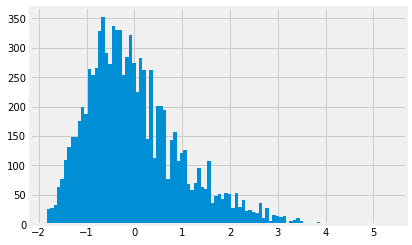

In [51]:
plt.hist(scale(np.log(x['win_baedang'])),bins=100)

(array([2.400e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.400e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 9.100e+01, 2.430e+02, 1.063e+03, 1.993e+03, 1.743e+03,
        1.189e+03, 6.980e+02, 4.500e+0

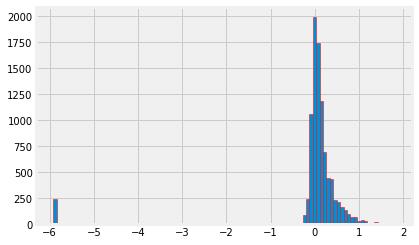

In [52]:
plt.hist(scale(np.log(x['tie_baedang'])),bins=100,edgecolor='r')

(array([ 15.,   2.,   8.,   5.,  17.,  50.,  36.,  53.,  67.,  78.,  89.,
        115.,  92., 133., 107., 133., 153., 131., 196., 183., 206., 256.,
        223., 183., 252., 156., 170., 211., 223., 162., 334., 168., 293.,
        292., 285., 104., 267., 243., 201., 189., 206., 176., 250., 129.,
        148., 179., 117., 183., 104., 107., 162.,  95., 110.,  59.,  90.,
         90.,  54.,  89.,  74.,  74.,  63.,  51.,  41.,  57.,  54.,  35.,
         33.,  41.,  37.,  27.,  23.,  32.,  23.,  30.,  19.,  22.,   0.,
         22.,  17.,   0.,  18.,  19.,  16.,   0.,   7.,  15.,   6.,   6.,
          3.,   0.,   3.,  10.,   4.,   4.,  11.,   0.,   6.,   1.,   4.,
          3.]),
 array([-2.13073244, -2.07043284, -2.01013325, -1.94983365, -1.88953405,
        -1.82923446, -1.76893486, -1.70863526, -1.64833566, -1.58803607,
        -1.52773647, -1.46743687, -1.40713728, -1.34683768, -1.28653808,
        -1.22623849, -1.16593889, -1.10563929, -1.0453397 , -0.9850401 ,
        -0.9247405 , -0.86

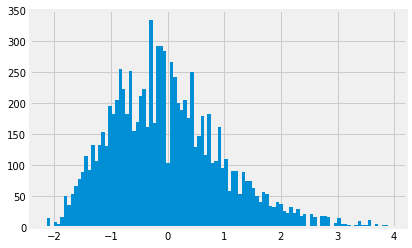

In [53]:
plt.hist(scale(np.log(x['lost_baedang'])),bins=100)

(array([ 157.,  667., 1081., 1498., 1885., 1683., 1211.,  709.,  345.,
         104.]),
 array([-2.45449924, -1.93222031, -1.40994138, -0.88766246, -0.36538353,
         0.1568954 ,  0.67917433,  1.20145325,  1.72373218,  2.24601111,
         2.76829004]),
 <a list of 10 Patch objects>)

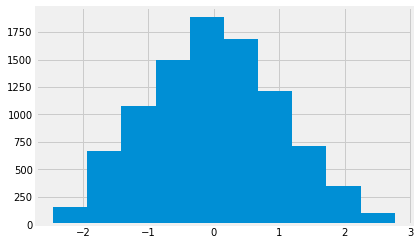

In [54]:
plt.hist(scale(x['win_pick_ratio']))

(array([2.400e+02, 0.000e+00, 4.700e+01, 2.280e+02, 7.510e+02, 2.516e+03,
        5.183e+03, 3.720e+02, 2.000e+00, 1.000e+00]),
 array([-4.70356689, -3.89888103, -3.09419516, -2.2895093 , -1.48482343,
        -0.68013757,  0.1245483 ,  0.92923416,  1.73392002,  2.53860589,
         3.34329175]),
 <a list of 10 Patch objects>)

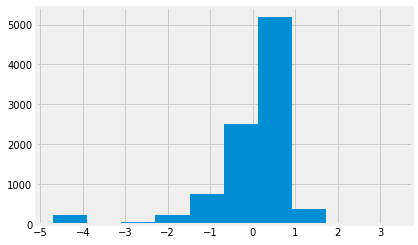

In [55]:
plt.hist(scale(x['tie_pick_ratio']))

(array([ 510., 1323., 1953., 1985., 1315., 1085.,  605.,  363.,  163.,
          38.]),
 array([-1.95257845, -1.42211696, -0.89165547, -0.36119397,  0.16926752,
         0.69972901,  1.23019051,  1.760652  ,  2.2911135 ,  2.82157499,
         3.35203648]),
 <a list of 10 Patch objects>)

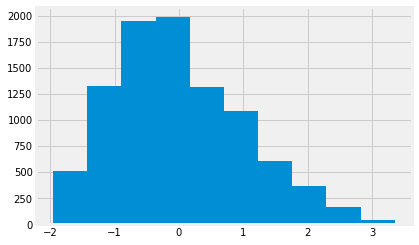

In [56]:
plt.hist(scale(x['lost_pick_ratio']))

In [57]:
com=[x,x_test]
for i in com:
    i['win_baedang']=scale(np.log(i['win_baedang']))
    i['tie_baedang']=scale(np.log(i['tie_baedang']))
    i['lost_baedang']=scale(np.log(i['lost_baedang']))
    i['win_pick_ratio']=scale(i['win_pick_ratio'])
    i['tie_pick_ratio']=scale(i['tie_pick_ratio'])
    i['lost_pick_ratio']=scale(i['lost_pick_ratio'])
x.head()
x_test.head()

,game_id,date,win_percentage,home_team,away_team,home_team_recent_10,away_team_recent_10,result,year,month,...,away_lost,home_sub,away_sub,win_baedang,tie_baedang,lost_baedang,baedang_sub,win_pick_ratio,tie_pick_ratio,lost_pick_ratio
0,0,2013-11-26,1.85 (45.9%) 3.30 (25.8%) 3.00 (28.3%),포항스틸,FC서울,5승4무1패,3승4무3패,1,0.25,0.909091,...,0.3,1.049939,-0.148668,-0.409524,0.103710,0.045171,-1.15,0.233890,0.169883,-0.308895
1,1,2013-11-26,3.60 (23.6%) 3.30 (25.8%) 1.68 (50.6%),부산아이,울산현대,2승2무6패,8승1무1패,1,0.25,0.909091,...,0.1,-1.039157,2.041494,1.129235,0.103710,-1.103213,1.92,-1.196923,0.169883,1.205739
2,3,2013-11-26,2.50 (34%) 3.10 (27.4%) 2.20 (38.6%),수원삼성,전북현대,2승3무5패,4승2무4패,1,0.25,0.909091,...,0.4,-0.778020,-0.148668,0.286427,-0.004026,-0.569119,0.30,-0.529638,0.472112,0.390689
3,5,2013-11-26,2.11 (40.3%) 2.90 (29.3%) 2.80 (30.4%),전남드래,성남FC,3승2무5패,4승2무4패,0,0.25,0.909091,...,0.4,-0.516883,-0.148668,-0.105580,-0.118948,-0.091475,-0.69,-0.125418,0.831010,-0.166261
4,6,2013-11-27,6.40 (13.3%) 3.90 (21.8%) 1.31 (64.9%),C모스크,바이뮌헨,5승0무5패,9승1무0패,0,0.25,0.909091,...,0.0,0.005391,2.667254,2.459088,0.391578,-1.595919,5.09,-1.857792,-0.585691,2.177007


,game_id,date,win_percentage,home_team,away_team,home_team_recent_10,away_team_recent_10,year,month,result_mean,...,away_lost,home_sub,away_sub,win_baedang,tie_baedang,lost_baedang,baedang_sub,win_pick_ratio,tie_pick_ratio,lost_pick_ratio
0,11941,2019-01-01,5.20 (16.8%) 3.90 (22.3%) 1.43 (60.9%),뉴캐슬,맨체스U,4승3무3패,5승3무2패,1.0,0.0,-1.0,...,0.222222,0.242646,0.782923,1.919013,0.354944,-1.413622,3.77,-1.635097,-0.262493,1.851738
1,11944,2019-01-01,1.85 (47%) 3.05 (28.5%) 3.55 (24.5%),울버햄턴,크리스탈,4승2무4패,3승2무5패,1.0,0.0,-1.0,...,0.555556,-0.025676,-0.696695,-0.361929,0.038153,0.280016,-1.70,0.209438,0.664839,-0.511540
2,11945,2019-01-01,2.01 (43.3%) 2.95 (29.5%) 3.20 (27.2%),에버턴,레스터,3승3무4패,3승4무3패,1.0,0.0,1.0,...,0.333333,-0.293999,-0.104848,-0.178855,-0.004806,0.086681,-1.19,-0.016548,0.814408,-0.336242
3,11946,2019-01-01,2.18 (39.9%) 2.75 (31.6%) 3.05 (28.5%),허더즈필,번리,2승1무7패,2승1무7패,1.0,0.0,-1.0,...,0.777778,-1.367289,-1.584466,0.000337,-0.095273,-0.002742,-0.87,-0.224211,1.128504,-0.251839
4,11947,2019-01-01,1.26 (69%) 4.60 (18.9%) 7.20 (12.1%),아스널,풀럼,5승2무3패,2승3무5패,1.0,0.0,1.0,...,0.555556,0.510969,-0.992619,-1.209606,0.567672,1.597143,-5.94,1.553139,-0.771029,-1.316612


(array([2.900e+01, 5.400e+01, 1.880e+02, 1.009e+03, 5.459e+03, 2.301e+03,
        2.700e+02, 2.000e+01, 7.000e+00, 3.000e+00]),
 array([-19.99 , -15.898, -11.806,  -7.714,  -3.622,   0.47 ,   4.562,
          8.654,  12.746,  16.838,  20.93 ]),
 <a list of 10 Patch objects>)

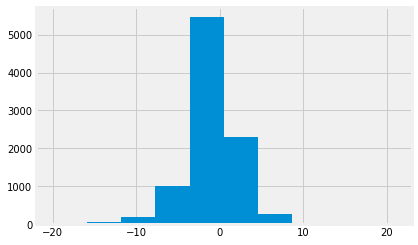

In [58]:
plt.hist(x['baedang_sub'])

In [59]:
com=[x,x_test]
for i in com:
    i['baedang_sub']=scale(i['baedang_sub'])
x.head()

,game_id,date,win_percentage,home_team,away_team,home_team_recent_10,away_team_recent_10,result,year,month,...,away_lost,home_sub,away_sub,win_baedang,tie_baedang,lost_baedang,baedang_sub,win_pick_ratio,tie_pick_ratio,lost_pick_ratio
0,0,2013-11-26,1.85 (45.9%) 3.30 (25.8%) 3.00 (28.3%),포항스틸,FC서울,5승4무1패,3승4무3패,1,0.25,0.909091,...,0.3,1.049939,-0.148668,-0.409524,0.103710,0.045171,-0.071729,0.233890,0.169883,-0.308895
1,1,2013-11-26,3.60 (23.6%) 3.30 (25.8%) 1.68 (50.6%),부산아이,울산현대,2승2무6패,8승1무1패,1,0.25,0.909091,...,0.1,-1.039157,2.041494,1.129235,0.103710,-1.103213,0.894173,-1.196923,0.169883,1.205739
2,3,2013-11-26,2.50 (34%) 3.10 (27.4%) 2.20 (38.6%),수원삼성,전북현대,2승3무5패,4승2무4패,1,0.25,0.909091,...,0.4,-0.778020,-0.148668,0.286427,-0.004026,-0.569119,0.384479,-0.529638,0.472112,0.390689
3,5,2013-11-26,2.11 (40.3%) 2.90 (29.3%) 2.80 (30.4%),전남드래,성남FC,3승2무5패,4승2무4패,0,0.25,0.909091,...,0.4,-0.516883,-0.148668,-0.105580,-0.118948,-0.091475,0.072999,-0.125418,0.831010,-0.166261
4,6,2013-11-27,6.40 (13.3%) 3.90 (21.8%) 1.31 (64.9%),C모스크,바이뮌헨,5승0무5패,9승1무0패,0,0.25,0.909091,...,0.0,0.005391,2.667254,2.459088,0.391578,-1.595919,1.891538,-1.857792,-0.585691,2.177007


## home team & away team

In [60]:
len(train['home_team'].unique())
len(train['away_team'].unique())
len(test['home_team'].unique())
len(test['away_team'].unique())
len(train['home_team'].unique())+len(train['away_team'].unique())+len(test['home_team'].unique())+len(test['away_team'].unique())

540

473

291

267

1571

In [61]:
ar1=np.array(train['home_team'].unique())
ar2=np.array(train['away_team'].unique())
ar3=np.array(test['home_team'].unique())
ar4=np.array(test['away_team'].unique())
ar=np.hstack((ar1,ar2,ar3,ar4))
ar.shape
sr=pd.Series(ar)
len(sr.unique())
team=sr.unique()

(1571,)

593

In [62]:
dic1={}
cnt=0
for i in range(len(team)):
    dic1[team[i]]=cnt
    cnt+=1
dic1

{'포항스틸': 0,
 '부산아이': 1,
 '수원삼성': 2,
 '전남드래': 3,
 'C모스크': 4,
 'PSG': 5,
 '트롬쇠IL': 6,
 'SH도네츠': 7,
 'CH오데사': 8,
 '엘프스보': 9,
 'SH카라간': 10,
 '엘체': 11,
 '하트오브': 12,
 '묀헨글라': 13,
 '마인츠05': 14,
 '모나코': 15,
 '툴루즈': 16,
 '카타니아': 17,
 '에버턴': 18,
 '울산현대': 19,
 '마르세유': 20,
 '로리앙': 21,
 '갱강': 22,
 'SC바스티': 23,
 '브로미치': 24,
 '에비앙TG': 25,
 '낭트': 26,
 '사우샘프': 27,
 '선덜랜드': 28,
 '상주상무': 29,
 '스완지': 30,
 '풀럼': 31,
 '스토크': 32,
 '보르도': 33,
 '랭스': 34,
 '생테티엔': 35,
 '맨체스U': 36,
 '크리스탈': 37,
 '함부르크': 38,
 '도르트문': 39,
 '프라이부': 40,
 '슈투트가': 41,
 'E프랑크': 42,
 '코펜하겐': 43,
 'St갈렌': 44,
 'M텔아비': 45,
 '갈라타사': 46,
 '피오렌티': 47,
 '비토리SC': 48,
 '샬케04': 49,
 '나폴리': 50,
 'AT마드': 51,
 '아작시오': 52,
 '몽펠리에': 53,
 '볼프스부': 54,
 '맨체스C': 55,
 '토트넘': 56,
 '카디프': 57,
 '브레멘': 58,
 '발렌시아': 59,
 '슈바이크': 60,
 '사수올로': 61,
 '헤타페': 62,
 '인터밀란': 63,
 'FC소쇼': 64,
 'OGC니스': 65,
 '헐시티': 66,
 '세인트미': 67,
 '뉴캐슬': 68,
 '노리치': 69,
 '첼시': 70,
 '인버네스': 71,
 '말라가': 72,
 '아스널': 73,
 '유벤투스': 74,
 'AS로마': 75,
 '우디네세': 76,
 '발랑시엔': 77,
 '에스파뇰': 78,
 '셀타

In [63]:
ll=list(dic1.values())
ll=minmax_scale(ll)
for i in range(len(team)):
    dic1[team[i]]=ll[i]
dic1

{'포항스틸': 0.0,
 '부산아이': 0.0016891891891891893,
 '수원삼성': 0.0033783783783783786,
 '전남드래': 0.005067567567567568,
 'C모스크': 0.006756756756756757,
 'PSG': 0.008445945945945946,
 '트롬쇠IL': 0.010135135135135136,
 'SH도네츠': 0.011824324324324325,
 'CH오데사': 0.013513513513513514,
 '엘프스보': 0.015202702702702704,
 'SH카라간': 0.016891891891891893,
 '엘체': 0.018581081081081082,
 '하트오브': 0.02027027027027027,
 '묀헨글라': 0.02195945945945946,
 '마인츠05': 0.02364864864864865,
 '모나코': 0.02533783783783784,
 '툴루즈': 0.02702702702702703,
 '카타니아': 0.028716216216216218,
 '에버턴': 0.030405405405405407,
 '울산현대': 0.0320945945945946,
 '마르세유': 0.033783783783783786,
 '로리앙': 0.03547297297297297,
 '갱강': 0.037162162162162164,
 'SC바스티': 0.03885135135135136,
 '브로미치': 0.04054054054054054,
 '에비앙TG': 0.04222972972972973,
 '낭트': 0.04391891891891892,
 '사우샘프': 0.045608108108108114,
 '선덜랜드': 0.0472972972972973,
 '상주상무': 0.048986486486486486,
 '스완지': 0.05067567567567568,
 '풀럼': 0.05236486486486487,
 '스토크': 0.05405405405405406,
 '보르도': 0.0557432

In [64]:
def d1(x):
    return dic1[x]
com=[x,x_test]
for i in com:
    i['home_team_num']=i['home_team'].map(d1)
    i['away_team_num']=i['away_team'].map(d1)
x.head()
x_test.head()
x['home_team_num'].dtype

,game_id,date,win_percentage,home_team,away_team,home_team_recent_10,away_team_recent_10,result,year,month,...,away_sub,win_baedang,tie_baedang,lost_baedang,baedang_sub,win_pick_ratio,tie_pick_ratio,lost_pick_ratio,home_team_num,away_team_num
0,0,2013-11-26,1.85 (45.9%) 3.30 (25.8%) 3.00 (28.3%),포항스틸,FC서울,5승4무1패,3승4무3패,1,0.25,0.909091,...,-0.148668,-0.409524,0.103710,0.045171,-0.071729,0.233890,0.169883,-0.308895,0.000000,0.202703
1,1,2013-11-26,3.60 (23.6%) 3.30 (25.8%) 1.68 (50.6%),부산아이,울산현대,2승2무6패,8승1무1패,1,0.25,0.909091,...,2.041494,1.129235,0.103710,-1.103213,0.894173,-1.196923,0.169883,1.205739,0.001689,0.032095
2,3,2013-11-26,2.50 (34%) 3.10 (27.4%) 2.20 (38.6%),수원삼성,전북현대,2승3무5패,4승2무4패,1,0.25,0.909091,...,-0.148668,0.286427,-0.004026,-0.569119,0.384479,-0.529638,0.472112,0.390689,0.003378,0.201014
3,5,2013-11-26,2.11 (40.3%) 2.90 (29.3%) 2.80 (30.4%),전남드래,성남FC,3승2무5패,4승2무4패,0,0.25,0.909091,...,-0.148668,-0.105580,-0.118948,-0.091475,0.072999,-0.125418,0.831010,-0.166261,0.005068,0.221284
4,6,2013-11-27,6.40 (13.3%) 3.90 (21.8%) 1.31 (64.9%),C모스크,바이뮌헨,5승0무5패,9승1무0패,0,0.25,0.909091,...,2.667254,2.459088,0.391578,-1.595919,1.891538,-1.857792,-0.585691,2.177007,0.006757,0.236486


,game_id,date,win_percentage,home_team,away_team,home_team_recent_10,away_team_recent_10,year,month,result_mean,...,away_sub,win_baedang,tie_baedang,lost_baedang,baedang_sub,win_pick_ratio,tie_pick_ratio,lost_pick_ratio,home_team_num,away_team_num
0,11941,2019-01-01,5.20 (16.8%) 3.90 (22.3%) 1.43 (60.9%),뉴캐슬,맨체스U,4승3무3패,5승3무2패,1.0,0.0,-1.0,...,0.782923,1.919013,0.354944,-1.413622,1.386310,-1.635097,-0.262493,1.851738,0.114865,0.060811
1,11944,2019-01-01,1.85 (47%) 3.05 (28.5%) 3.55 (24.5%),울버햄턴,크리스탈,4승2무4패,3승2무5패,1.0,0.0,-1.0,...,-0.696695,-0.361929,0.038153,0.280016,-0.162583,0.209438,0.664839,-0.511540,0.736486,0.062500
2,11945,2019-01-01,2.01 (43.3%) 2.95 (29.5%) 3.20 (27.2%),에버턴,레스터,3승3무4패,3승4무3패,1.0,0.0,1.0,...,-0.104848,-0.178855,-0.004806,0.086681,-0.018171,-0.016548,0.814408,-0.336242,0.030405,0.344595
3,11946,2019-01-01,2.18 (39.9%) 2.75 (31.6%) 3.05 (28.5%),허더즈필,번리,2승1무7패,2승1무7패,1.0,0.0,-1.0,...,-1.584466,0.000337,-0.095273,-0.002742,0.072441,-0.224211,1.128504,-0.251839,0.744932,0.322635
4,11947,2019-01-01,1.26 (69%) 4.60 (18.9%) 7.20 (12.1%),아스널,풀럼,5승2무3패,2승3무5패,1.0,0.0,1.0,...,-0.992619,-1.209606,0.567672,1.597143,-1.363188,1.553139,-0.771029,-1.316612,0.123311,0.052365


dtype('float64')

(array([2117., 1931., 1441.,  763.,  678.,  830.,  463.,  507.,  412.,
         198.]),
 array([0.        , 0.0910473 , 0.18209459, 0.27314189, 0.36418919,
        0.45523649, 0.54628378, 0.63733108, 0.72837838, 0.81942568,
        0.91047297]),
 <a list of 10 Patch objects>)

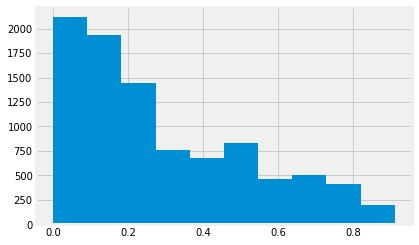

In [65]:
plt.hist(x['home_team_num'])

## pick

In [66]:
pick.head()

,game_id,analyst,choosed
0,0,김현회,1.0
1,1,김현회,0.0
2,2,김현회,0.0
3,3,김현회,0.0
4,4,김현회,0.0


In [67]:
len(pick['game_id'].unique())
pick['analyst'].unique()
type(pick['game_id'].unique())

14095

array(['김현회', '김현민', '송영주', '김민곤', '박찬준', '이형석', '박상경', '이성구', '노주환',
       '이영기', '이영민', '최인혁', '이병철', '윤진만', '강사흔'], dtype=object)

numpy.ndarray

In [68]:
train.shape
len(train['game_id'].unique())
test.shape
len(test['game_id'].unique())
train.shape[0]+test.shape[0]

(9340, 8)

9340

(2797, 7)

2797

12137

In [69]:
analyst=pick.groupby(['game_id'])['choosed'].mean().reset_index(name='choosed')
x=pd.merge(x,analyst,on=['game_id'],how='left')
x_test=pd.merge(x_test,analyst,on=['game_id'],how='left')
x.head()

,game_id,date,win_percentage,home_team,away_team,home_team_recent_10,away_team_recent_10,result,year,month,...,win_baedang,tie_baedang,lost_baedang,baedang_sub,win_pick_ratio,tie_pick_ratio,lost_pick_ratio,home_team_num,away_team_num,choosed
0,0,2013-11-26,1.85 (45.9%) 3.30 (25.8%) 3.00 (28.3%),포항스틸,FC서울,5승4무1패,3승4무3패,1,0.25,0.909091,...,-0.409524,0.103710,0.045171,-0.071729,0.233890,0.169883,-0.308895,0.000000,0.202703,1.0
1,1,2013-11-26,3.60 (23.6%) 3.30 (25.8%) 1.68 (50.6%),부산아이,울산현대,2승2무6패,8승1무1패,1,0.25,0.909091,...,1.129235,0.103710,-1.103213,0.894173,-1.196923,0.169883,1.205739,0.001689,0.032095,0.0
2,3,2013-11-26,2.50 (34%) 3.10 (27.4%) 2.20 (38.6%),수원삼성,전북현대,2승3무5패,4승2무4패,1,0.25,0.909091,...,0.286427,-0.004026,-0.569119,0.384479,-0.529638,0.472112,0.390689,0.003378,0.201014,0.0
3,5,2013-11-26,2.11 (40.3%) 2.90 (29.3%) 2.80 (30.4%),전남드래,성남FC,3승2무5패,4승2무4패,0,0.25,0.909091,...,-0.105580,-0.118948,-0.091475,0.072999,-0.125418,0.831010,-0.166261,0.005068,0.221284,0.5
4,6,2013-11-27,6.40 (13.3%) 3.90 (21.8%) 1.31 (64.9%),C모스크,바이뮌헨,5승0무5패,9승1무0패,0,0.25,0.909091,...,2.459088,0.391578,-1.595919,1.891538,-1.857792,-0.585691,2.177007,0.006757,0.236486,NaN


In [70]:
x['choosed'].mean()
x_test['choosed'].mean()
x.isna().sum()
x_test.isna().sum()

0.5860035011172756

0.5951050811386004

game_id                   0
date                      0
win_percentage            0
home_team                 0
away_team                 0
home_team_recent_10    1680
away_team_recent_10    1680
result                    0
year                      0
month                     0
result_mean               0
home_win                  0
home_tie                  0
home_lost                 0
away_win                  0
away_tie                  0
away_lost                 0
home_sub                  0
away_sub                  0
win_baedang               0
tie_baedang               0
lost_baedang              0
baedang_sub               0
win_pick_ratio            0
tie_pick_ratio            0
lost_pick_ratio           0
home_team_num             0
away_team_num             0
choosed                1100
dtype: int64

game_id                  0
date                     0
win_percentage           0
home_team                0
away_team                0
home_team_recent_10    307
away_team_recent_10    307
year                     0
month                    0
result_mean              0
home_win                 0
home_tie                 0
home_lost                0
away_win                 0
away_tie                 0
away_lost                0
home_sub                 0
away_sub                 0
win_baedang              0
tie_baedang              0
lost_baedang             0
baedang_sub              0
win_pick_ratio           0
tie_pick_ratio           0
lost_pick_ratio          0
home_team_num            0
away_team_num            0
choosed                470
dtype: int64

In [71]:
com=[x,x_test]
for i in com:
    i['choosed']=i['choosed'].fillna(0.5)
x.isna().sum()

game_id                   0
date                      0
win_percentage            0
home_team                 0
away_team                 0
home_team_recent_10    1680
away_team_recent_10    1680
result                    0
year                      0
month                     0
result_mean               0
home_win                  0
home_tie                  0
home_lost                 0
away_win                  0
away_tie                  0
away_lost                 0
home_sub                  0
away_sub                  0
win_baedang               0
tie_baedang               0
lost_baedang              0
baedang_sub               0
win_pick_ratio            0
tie_pick_ratio            0
lost_pick_ratio           0
home_team_num             0
away_team_num             0
choosed                   0
dtype: int64

In [72]:
analyst_num=pick.groupby(['game_id']).size().reset_index(name='num_analyst')
x=pd.merge(x,analyst_num,on='game_id',how='left')
x_test=pd.merge(x_test,analyst_num,on=['game_id'],how='left')
x['num_analyst']=x['num_analyst'].fillna(0)
x_test['num_analyst']=x_test['num_analyst'].fillna(0)
x.head()

,game_id,date,win_percentage,home_team,away_team,home_team_recent_10,away_team_recent_10,result,year,month,...,tie_baedang,lost_baedang,baedang_sub,win_pick_ratio,tie_pick_ratio,lost_pick_ratio,home_team_num,away_team_num,choosed,num_analyst
0,0,2013-11-26,1.85 (45.9%) 3.30 (25.8%) 3.00 (28.3%),포항스틸,FC서울,5승4무1패,3승4무3패,1,0.25,0.909091,...,0.103710,0.045171,-0.071729,0.233890,0.169883,-0.308895,0.000000,0.202703,1.0,1.0
1,1,2013-11-26,3.60 (23.6%) 3.30 (25.8%) 1.68 (50.6%),부산아이,울산현대,2승2무6패,8승1무1패,1,0.25,0.909091,...,0.103710,-1.103213,0.894173,-1.196923,0.169883,1.205739,0.001689,0.032095,0.0,1.0
2,3,2013-11-26,2.50 (34%) 3.10 (27.4%) 2.20 (38.6%),수원삼성,전북현대,2승3무5패,4승2무4패,1,0.25,0.909091,...,-0.004026,-0.569119,0.384479,-0.529638,0.472112,0.390689,0.003378,0.201014,0.0,1.0
3,5,2013-11-26,2.11 (40.3%) 2.90 (29.3%) 2.80 (30.4%),전남드래,성남FC,3승2무5패,4승2무4패,0,0.25,0.909091,...,-0.118948,-0.091475,0.072999,-0.125418,0.831010,-0.166261,0.005068,0.221284,0.5,1.0
4,6,2013-11-27,6.40 (13.3%) 3.90 (21.8%) 1.31 (64.9%),C모스크,바이뮌헨,5승0무5패,9승1무0패,0,0.25,0.909091,...,0.391578,-1.595919,1.891538,-1.857792,-0.585691,2.177007,0.006757,0.236486,0.5,0.0


In [73]:
com=[x,x_test]
for i in com:
    i['num_analyst']=minmax_scale(i['num_analyst'])
x.isna().sum()

game_id                   0
date                      0
win_percentage            0
home_team                 0
away_team                 0
home_team_recent_10    1680
away_team_recent_10    1680
result                    0
year                      0
month                     0
result_mean               0
home_win                  0
home_tie                  0
home_lost                 0
away_win                  0
away_tie                  0
away_lost                 0
home_sub                  0
away_sub                  0
win_baedang               0
tie_baedang               0
lost_baedang              0
baedang_sub               0
win_pick_ratio            0
tie_pick_ratio            0
lost_pick_ratio           0
home_team_num             0
away_team_num             0
choosed                   0
num_analyst               0
dtype: int64

# modeling

- 데이터 많이 건드리긴 했는데 변수는 몇 개 안쓰는게 점수가 더 좋았다.

- 코드 정리하다가 결과가 조금 바뀌었을 수도 있다.

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
x8=x[['home_sub','away_sub','baedang_sub','choosed']]
x_test8=x_test[['home_sub','away_sub','baedang_sub','choosed']]
x8.head()

,home_sub,away_sub,baedang_sub,choosed
0,1.049939,-0.148668,-0.071729,1.0
1,-1.039157,2.041494,0.894173,0.0
2,-0.778020,-0.148668,0.384479,0.0
3,-0.516883,-0.148668,0.072999,0.5
4,0.005391,2.667254,1.891538,0.5


In [76]:
lr8=LogisticRegression()
lr8=lr8.fit(x8,y)
test['lr']=lr8.predict_proba(x_test8)[:,1]
test.head()

,game_id,date,win_percentage,home_team,away_team,home_team_recent_10,away_team_recent_10,lr
0,11941,2019-01-01,5.20 (16.8%) 3.90 (22.3%) 1.43 (60.9%),뉴캐슬,맨체스U,4승3무3패,5승3무2패,0.231499
1,11944,2019-01-01,1.85 (47%) 3.05 (28.5%) 3.55 (24.5%),울버햄턴,크리스탈,4승2무4패,3승2무5패,0.622923
2,11945,2019-01-01,2.01 (43.3%) 2.95 (29.5%) 3.20 (27.2%),에버턴,레스터,3승3무4패,3승4무3패,0.593330
3,11946,2019-01-01,2.18 (39.9%) 2.75 (31.6%) 3.05 (28.5%),허더즈필,번리,2승1무7패,2승1무7패,0.551369
4,11947,2019-01-01,1.26 (69%) 4.60 (18.9%) 7.20 (12.1%),아스널,풀럼,5승2무3패,2승3무5패,0.856862


In [ ]:
test[['game_id','result']].to_csv("p44.csv",index=False)  # best

In [77]:
lr8.coef_

array([[-0.07660622,  0.08018419, -1.06150648,  0.2336508 ]])

In [1507]:
grid={"C":np.logspace(-3,3,7),"penalty":["l1","l2"]} # l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x8,y)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

tuned hpyerparameters :(best parameters)  {'C': 1.0}
accuracy : 0.6785867237687366
